In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from warnings import filterwarnings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [3]:
titanicTrain=pd.read_csv("/kaggle/input/titanic/train.csv")
titanicTest=pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
y=titanicTrain[["Survived"]]
titanicTrain.drop(["Survived"],axis=1,inplace=True)

In [5]:
titanicTest.head()
print("-"*120)
titanicTrain.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


------------------------------------------------------------------------------------------------------------------------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df=pd.concat([titanicTrain,titanicTest],ignore_index=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [8]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
print("Pclass:", df["Pclass"].unique())
print("Sex:", df["Sex"].unique())
print("SibSp:",df["SibSp"].unique())
print("Parch:",df["Parch"].unique())
print("Ticket:",df["Ticket"].unique())
print("Cabin:",df["Cabin"].unique())
print("Embarked:",df["Embarked"].unique())


Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6 9]
Ticket: ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A

In [10]:
titanicTrain.drop(["Cabin"],axis=1,inplace=True)

In [11]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<Figure size 800x800 with 0 Axes>

<Axes: >

/tmp/ipykernel_19/2736227848.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

<Axes: >

<Axes: >

<Axes: >

/tmp/ipykernel_19/2736227848.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

<Axes: >

<Axes: >

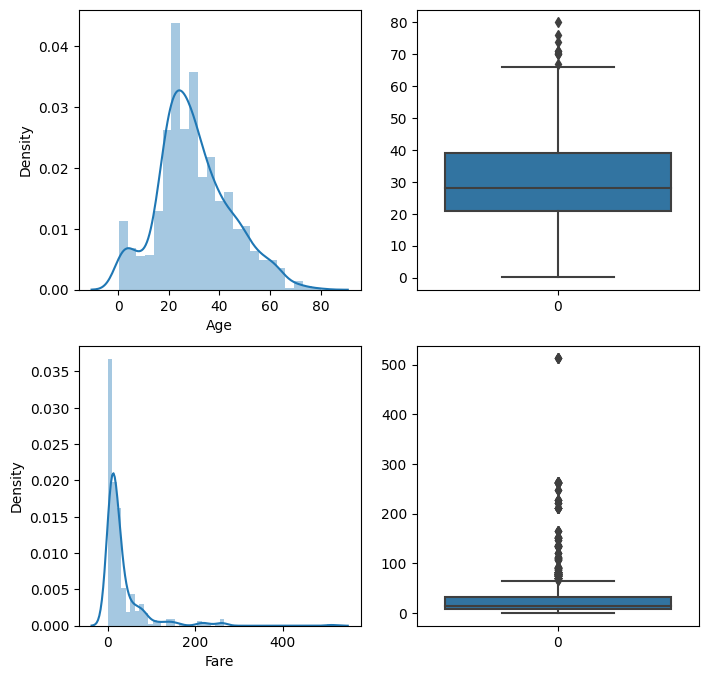

In [12]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.distplot(df['Age'])
plt.subplot(2,2,2)
sns.boxplot(df['Age'])
plt.subplot(2,2,3)
sns.distplot(df['Fare'])
plt.subplot(2,2,4)
sns.boxplot(df['Fare'])
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

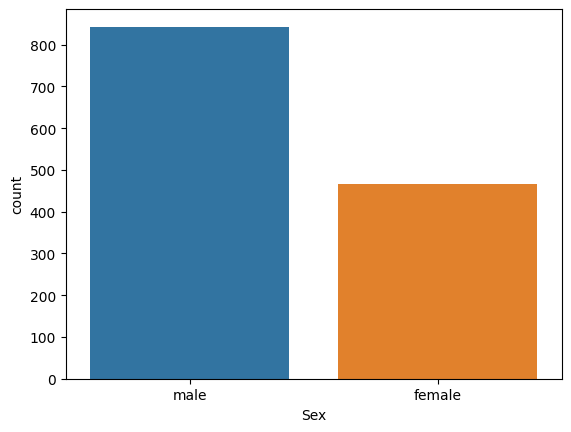

In [13]:
sns.countplot(x="Sex",data=df)

<Axes: xlabel='Pclass', ylabel='count'>

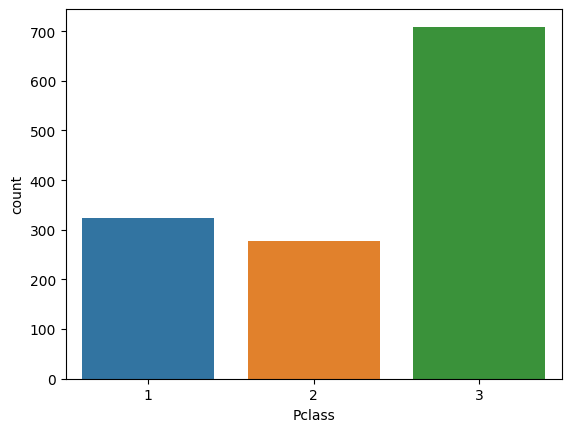

In [14]:
sns.countplot(x="Pclass",data=df)

<Axes: xlabel='SibSp', ylabel='count'>

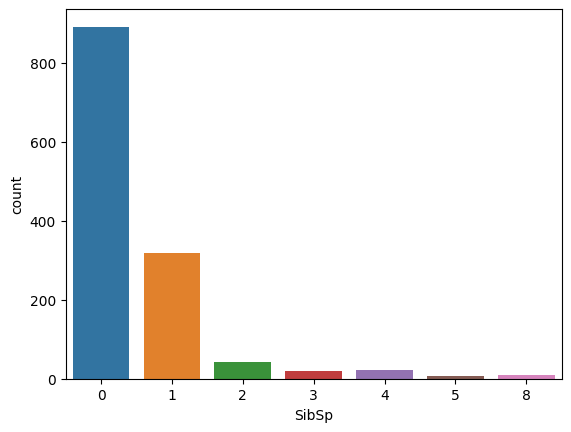

In [15]:
sns.countplot(x="SibSp",data=df)

<Axes: xlabel='Embarked', ylabel='count'>

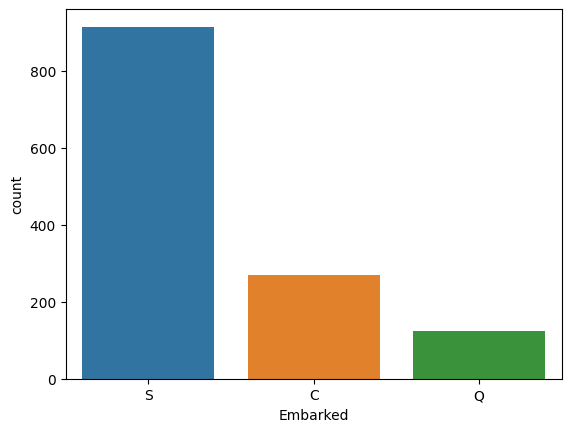

In [16]:
sns.countplot(x="Embarked",data=df)


## Outliers & Missing Values

In [17]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

outliers = find_outliers_IQR(titanicTrain["Fare"])
print("Fare number of outliers:" + str(len(outliers)))

print("Fare max outlier value:" + str(outliers.max()))

print("Fare min outlier value:" + str(outliers.min()))

print("-"*50)
outliers=find_outliers_IQR(titanicTrain["Age"])
print("Age number of outliers:" + str(len(outliers)))

print("Age max outlier value:" + str(outliers.max()))

print("Age min outlier value:" + str(outliers.min()))

Fare number of outliers:116
Fare max outlier value:512.3292
Fare min outlier value:66.6
--------------------------------------------------
Age number of outliers:11
Age max outlier value:80.0
Age min outlier value:65.0


In [18]:

def impute_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(df > upper,
    df.mean(),
    np.where(
    df < lower,
        df.mean(),
        df))
    return df

titanicTrain["Age"] = impute_outliers_IQR(titanicTrain["Age"])
print("Age Describe\n",titanicTrain.describe()["Age"])
print("-"*50)
titanicTrain["Fare"] = impute_outliers_IQR(titanicTrain["Fare"])
print("Fare Describe\n",titanicTrain.describe()["Fare"])

Age Describe
 count    714.000000
mean      29.081737
std       13.622385
min        0.420000
25%       20.125000
50%       28.000000
75%       37.000000
max       64.000000
Name: Age, dtype: float64
--------------------------------------------------
Fare Describe
 count    891.000000
mean      19.694510
std       13.556718
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.000000
Name: Fare, dtype: float64


In [19]:
titanicTrain['Age']=titanicTrain['Age'].fillna(titanicTrain['Age'].mean())
titanicTrain['Fare']=titanicTrain['Fare'].fillna(titanicTrain['Fare'].mean())
titanicTrain = titanicTrain.fillna(titanicTrain.mode())
titanicTrain= titanicTrain.apply(lambda x:x.fillna(x.value_counts().index[0]))
titanicTrain.info()
print("-"*100)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB
----------------------------------------------------------------------------------------------------


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [20]:
missingVal=(titanicTrain.iloc[:,:]==0).sum()
print(missingVal)
print("-"*100)
#sparsity 
num_zeros = (titanicTrain == 0).sum()
total_elements = titanicTrain.shape[0] * titanicTrain.shape[1]
sparsity = num_zeros / total_elements
print(sparsity)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp          608
Parch          678
Ticket           0
Fare            15
Embarked         0
dtype: int64
----------------------------------------------------------------------------------------------------
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.068238
Parch          0.076094
Ticket         0.000000
Fare           0.001684
Embarked       0.000000
dtype: float64


## Encoding

In [21]:
encoder=ce.OneHotEncoder(cols=["Pclass","Sex","Embarked","SibSp","Parch"],handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_ohe= encoder.fit_transform(titanicTrain)
encoder=ce.TargetEncoder(cols='Ticket') 
data_target=encoder.fit_transform(data_ohe['Ticket'],data_ohe['Fare'])


In [22]:
data_ohe.drop(["Ticket"],axis=1,inplace=True)
data_ohe.drop(["Name"],axis=1,inplace=True)
data_ohe.drop(["PassengerId"],axis=1,inplace=True)

In [23]:
data_c=pd.concat([data_ohe,data_target],axis=1)
data_c

,Pclass_3.0,Pclass_1.0,Pclass_2.0,Sex_male,Sex_female,Age,SibSp_1.0,SibSp_0.0,SibSp_3.0,SibSp_4.0,...,Parch_2.0,Parch_5.0,Parch_3.0,Parch_4.0,Parch_6.0,Fare,Embarked_S,Embarked_C,Embarked_Q,Ticket
0,1.0,0.0,0.0,1.0,0.0,22.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.250000,1.0,0.0,0.0,18.075374
1,0.0,1.0,0.0,0.0,1.0,38.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,32.204208,0.0,1.0,0.0,21.322128
2,1.0,0.0,0.0,0.0,1.0,26.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.925000,1.0,0.0,0.0,18.163197
3,0.0,1.0,0.0,0.0,1.0,35.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,53.100000,1.0,0.0,0.0,24.433114
4,1.0,0.0,0.0,1.0,0.0,35.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.050000,1.0,0.0,0.0,18.179461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,1.0,1.0,0.0,27.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.000000,1.0,0.0,0.0,18.823498
887,0.0,1.0,0.0,0.0,1.0,19.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30.000000,1.0,0.0,0.0,21.035342
888,1.0,0.0,0.0,0.0,1.0,29.081737,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,23.450000,1.0,0.0,0.0,20.227230
889,0.0,1.0,0.0,1.0,0.0,26.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30.000000,0.0,1.0,0.0,21.035342


In [24]:
scaler=StandardScaler()
scaled=scaler.fit_transform(data_c)

scaled_df = pd.DataFrame(scaled,columns = data_c.columns)
scaled_df

,Pclass_3.0,Pclass_1.0,Pclass_2.0,Sex_male,Sex_female,Age,SibSp_1.0,SibSp_0.0,SibSp_3.0,SibSp_4.0,...,Parch_2.0,Parch_5.0,Parch_3.0,Parch_4.0,Parch_6.0,Fare,Embarked_S,Embarked_C,Embarked_Q,Ticket
0,0.902587,-0.565685,-0.510152,0.737695,-0.737695,-0.581140,1.806421,-1.465746,-0.135225,-0.143592,...,-0.314076,-0.075122,-0.075122,-0.067153,-0.03352,-0.918474,0.615838,-0.482043,-0.307562,-0.871476
1,-1.107926,1.767767,-0.510152,-1.355574,1.355574,0.731849,1.806421,-1.465746,-0.135225,-0.143592,...,-0.314076,-0.075122,-0.075122,-0.067153,-0.03352,0.923286,-1.623803,2.074505,-0.307562,0.757565
2,0.902587,-0.565685,-0.510152,-1.355574,1.355574,-0.252893,-0.553581,0.682247,-0.135225,-0.143592,...,-0.314076,-0.075122,-0.075122,-0.067153,-0.03352,-0.868656,0.615838,-0.482043,-0.307562,-0.827411
3,-1.107926,1.767767,-0.510152,-1.355574,1.355574,0.485663,1.806421,-1.465746,-0.135225,-0.143592,...,-0.314076,-0.075122,-0.075122,-0.067153,-0.03352,2.465512,0.615838,-0.482043,-0.307562,2.318485
4,0.902587,-0.565685,-0.510152,0.737695,-0.737695,0.485663,-0.553581,0.682247,-0.135225,-0.143592,...,-0.314076,-0.075122,-0.075122,-0.067153,-0.03352,-0.859430,0.615838,-0.482043,-0.307562,-0.819251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-1.107926,-0.565685,1.960202,0.737695,-0.737695,-0.170831,-0.553581,0.682247,-0.135225,-0.143592,...,-0.314076,-0.075122,-0.075122,-0.067153,-0.03352,-0.494092,0.615838,-0.482043,-0.307562,-0.496109
887,-1.107926,1.767767,-0.510152,-1.355574,1.355574,-0.827325,-0.553581,0.682247,-0.135225,-0.143592,...,-0.314076,-0.075122,-0.075122,-0.067153,-0.03352,0.760603,0.615838,-0.482043,-0.307562,0.613672
888,0.902587,-0.565685,-0.510152,-1.355574,1.355574,0.000000,1.806421,-1.465746,-0.135225,-0.143592,...,3.183944,-0.075122,-0.075122,-0.067153,-0.03352,0.277176,0.615838,-0.482043,-0.307562,0.208206
889,-1.107926,1.767767,-0.510152,0.737695,-0.737695,-0.252893,-0.553581,0.682247,-0.135225,-0.143592,...,-0.314076,-0.075122,-0.075122,-0.067153,-0.03352,0.760603,-1.623803,2.074505,-0.307562,0.613672


In [25]:
x_train,x_test,y_train,y_test=train_test_split(scaled_df,y, test_size=0.33,random_state=0)

# Decision Tree

In [26]:
#Decision Tree
dTC=DecisionTreeClassifier(criterion="entropy")
dTC.fit(x_train,y_train)
y_pred=dTC.predict(x_test)
yproba1=dTC.predict_proba(x_test)
conMx=confusion_matrix(y_test,y_pred)
print(conMx)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

DecisionTreeClassifier(criterion='entropy')

[[150  34]
 [ 31  80]]
Accuracy: 0.780


# Gaussian Naive Bayes

In [27]:
#Gaussian Naive Bayes
gnb=GaussianNB()
gnb.fit(x_train,y_train)

y_pred=gnb.predict(x_test)
yproba2=gnb.predict_proba(x_test)
conMx=confusion_matrix(y_test,y_pred)
print(conMx)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

[[ 11 173]
 [  2 109]]
Accuracy: 0.407


# Random Forest

In [28]:
#Random Forest
rFC=RandomForestClassifier(n_estimators=10,criterion="entropy")
rFC.fit(x_train,y_train)

y_pred=rFC.predict(x_test)
yproba3=rFC.predict_proba(x_test)
conMx=confusion_matrix(y_test,y_pred)
print(conMx)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

/tmp/ipykernel_19/3685538439.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rFC.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

[[155  29]
 [ 35  76]]
Accuracy: 0.783


In [29]:
fpr1, tpr1, thresh1 = roc_curve(y_test, yproba1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, yproba2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, yproba3[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_test, yproba1[:,1])
auc_score2 = roc_auc_score(y_test, yproba2[:,1])
auc_score3 = roc_auc_score(y_test, yproba3[:,1])

print("Decision Tree AUC:",auc_score1)
print("GNaive Bayes AUC:",auc_score2)
print("Random Forest AUC:",auc_score3)

Decision Tree AUC: 0.7687279670975323
GNaive Bayes AUC: 0.5243096357226792
Random Forest AUC: 0.8617312965139052


/tmp/ipykernel_19/3168925842.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


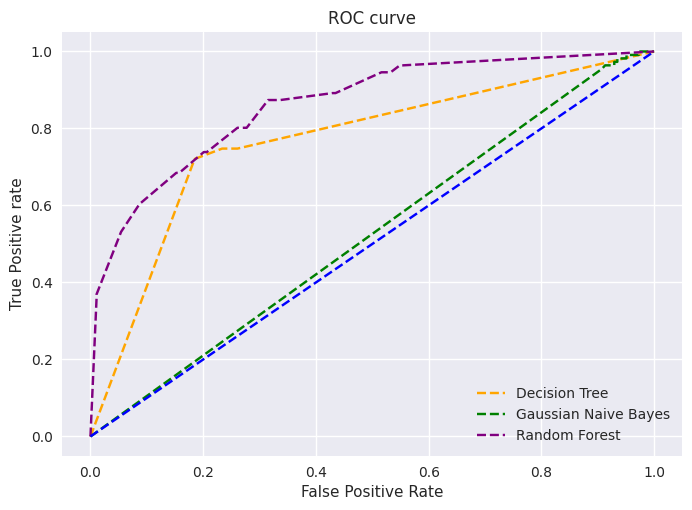

In [30]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Gaussian Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();